## Instructions

### 1. Please ensure all the required libraries are imported before running the code.
### 2. Please ensure yeast2vs4.csv is residing in the same directory as this code file.

In [1]:
# Importing all the required libraries
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC,LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,\
StackingClassifier,VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, zero_one_loss, \
classification_report, accuracy_score

In [2]:
Original_DF = pd.read_csv('yeast2vs4.csv')
Original_DF.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [3]:
Original_DF.shape

(514, 9)

In [4]:
Original_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
mcg,514.0,0.504611,0.134528,0.19,0.41,0.49,0.58,0.97
gvh,514.0,0.482763,0.103216,0.21,0.42,0.47,0.55,0.90
alm,514.0,0.523463,0.075013,0.27,0.49,0.52,0.56,1.00
mit,514.0,0.232607,0.117278,0.00,0.16,0.20,0.27,1.00
erl,514.0,0.504864,0.049122,0.50,0.50,0.50,0.50,1.00
pox,514.0,0.000973,0.022054,0.00,0.00,0.00,0.00,0.50
vac,514.0,0.500467,0.063732,0.13,0.48,0.51,0.54,0.73
nuc,514.0,0.256070,0.091569,0.00,0.22,0.22,0.27,0.80


In [5]:
# Data Visualization

<AxesSubplot:>

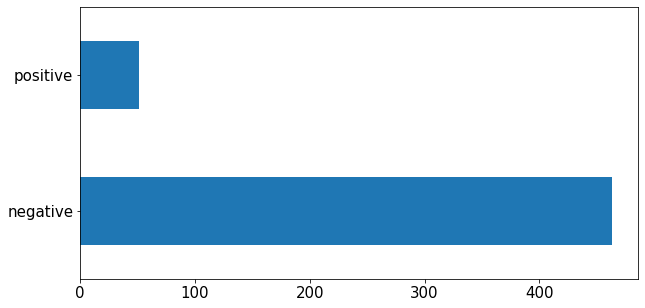

In [6]:
Original_DF_cats = Original_DF['class'].value_counts()
Original_DF_cats.plot(kind='barh', figsize=(10,5), fontsize=15)

## <font color=blue>Looking at the above horizontal plot, it is clearly shows that the dataset is biased towards negative class.</font>

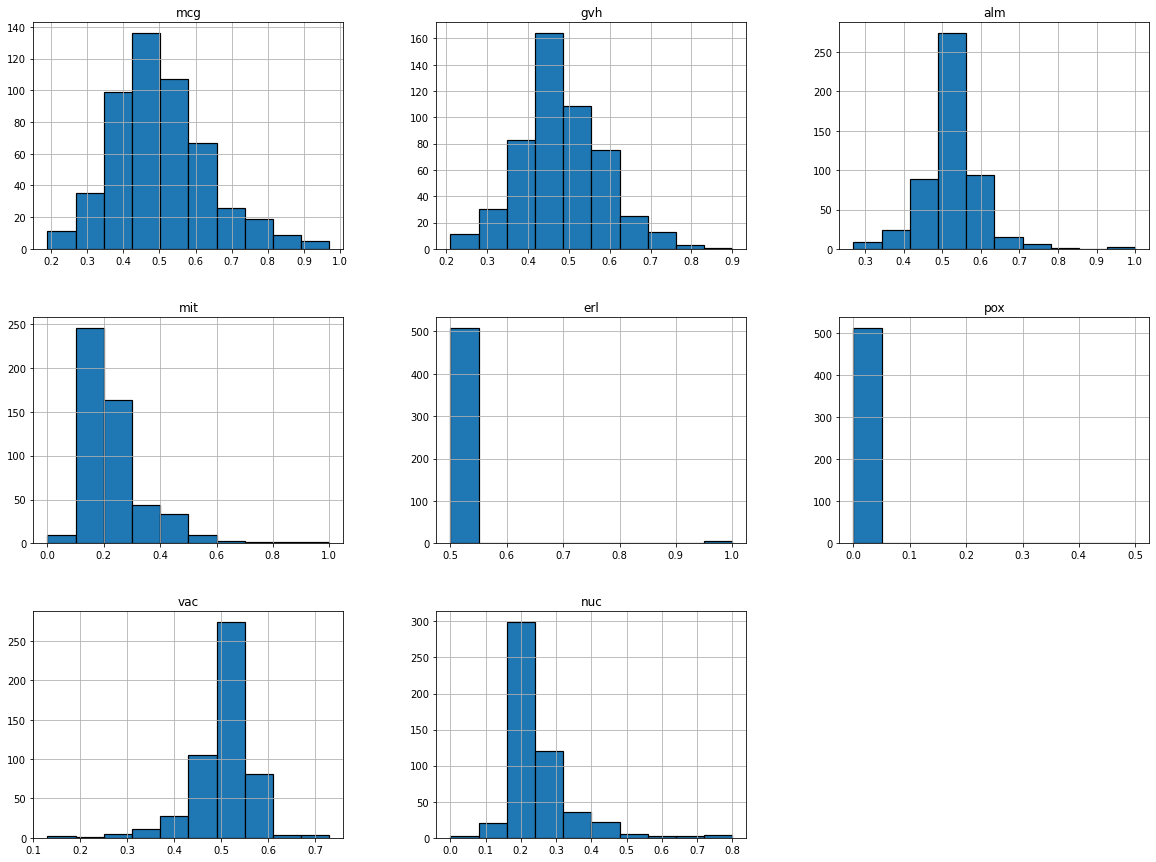

In [7]:
# Let's check the distribution of each numeric variable in the dataset:
Original_DF.hist(edgecolor='black', linewidth=1.2, figsize=(20,15));

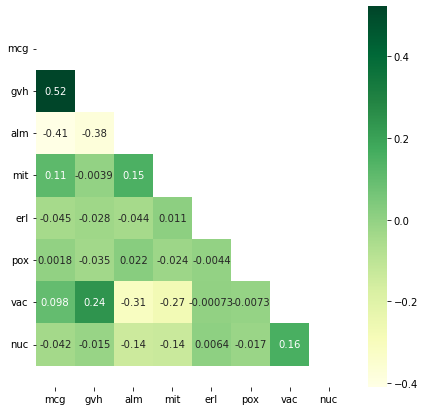

In [8]:
# Lets plot the correlation between each variable
corr = Original_DF.corr()
mask = np.zeros_like(corr, bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7,7))
ax = sns.heatmap(corr, mask = mask, annot=True, cmap='YlGn')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.yticks(rotation=0);

## <font color=blue>In the above heatmap used for plotting correlation between numeric variables, we can see that there is a good postive correlation between some of the variables.</font>

In [9]:
# Splitting the data in 70:30 train test split ratio
from sklearn.model_selection import train_test_split

x,y = Original_DF.loc[:,Original_DF.columns != 'class'], Original_DF.loc[:,'class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

class_labels = y_train.unique()

# Q3. Feature Importance

## <font color=blue>A. Using Coefficients as feature importance</font>

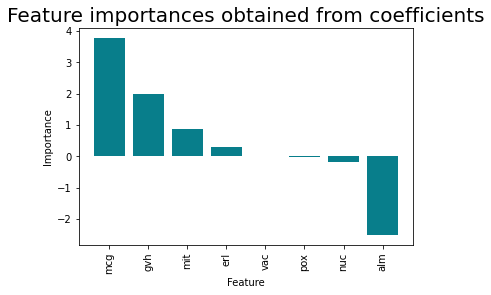

In [48]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## <font color=blue>B. Tree-based feature importance</font>

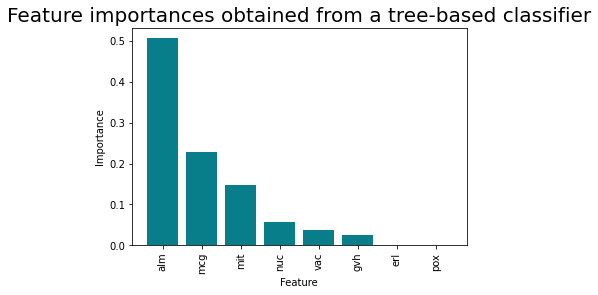

In [11]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from a tree-based classifier', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

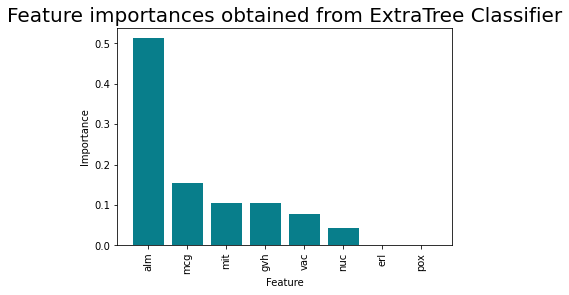

In [54]:
clf = ExtraTreeClassifier()
clf.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': clf.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)


plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from ExtraTree Classifier', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

## Q4. Non-ensemble models

# <font color=blue>A. Decision Tree</font>

In [13]:
# searching for the best parameters
parameters = {
    'random_state':[17,42],
    'criterion':('entropy','log_loss','gini'), 
    'max_features':('sqrt','log2'),
    'splitter':('best','random'),
    'max_depth':[5,10,15,20,25,30,35,40]
}

dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=17, splitter=best;, score=0.972 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=17, splitter=best;, score=0.915 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=17, splitter=random;, score=0.887 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=42, splitter=best;, score=0.931 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=42, splitter=random;, score=0.903 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, random_state=42, splitter=random;, score=0.986 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, random_state=17, splitter=best;, score=0.944 total time=   0.0s
[CV 1/5] END criterion=entropy, max

[CV 3/5] END criterion=log_loss, max_depth=10, max_features=sqrt, random_state=42, splitter=random;, score=0.944 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=10, max_features=sqrt, random_state=42, splitter=random;, score=0.944 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=10, max_features=sqrt, random_state=42, splitter=random;, score=0.944 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=10, max_features=log2, random_state=17, splitter=best;, score=0.917 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=10, max_features=log2, random_state=17, splitter=best;, score=0.903 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=10, max_features=log2, random_state=17, splitter=best;, score=0.903 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=10, max_features=log2, random_state=17, splitter=best;, score=0.917 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=15, max_features=sqrt, random_state=42, s

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('entropy', 'log_loss', 'gini'),
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                         'max_features': ('sqrt', 'log2'),
                         'random_state': [17, 42],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=3)

In [14]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'random_state': 42, 'splitter': 'random'} 
 0.952699530516432


-----------------------------------------------
Parameter Settings:  DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=42, splitter='random')
Confusion Matrix Raw Format:
 [[138   0]
 [  3  14]] 

-----------------------------------------------

% of Correctly classified instances:  0.9806 
% of Incorrectly classified instances:  0.0194 

-----------------------------------------------
Accuracy: 0.9806
Precision: 0.9811
Recall: 0.9806
F1 Score: 0.9798
Cohen Kappa: 0.8926
Matthews Corrcoef: 0.9806
ROC AUC: 0.9378
Train Time(s) 0.006741046905517578
Train Time(s) 0.008183002471923828


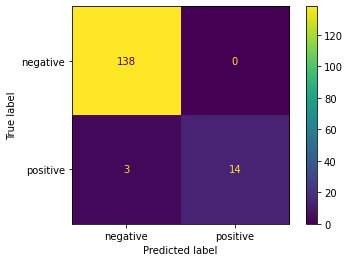

In [15]:
start_train = time.time()
# Train the model
dt = DecisionTreeClassifier(criterion='entropy',max_depth=15,max_features='sqrt',random_state=42,splitter='random')
dt.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
print("Parameter Settings: ",dt)
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Train Time(s)",test_time)

### <font color=green>Train and Test accuracy for Decision Tree classifier.</font>

In [16]:
train_scores, test_scores = list(), list()

values = [i for i in range(1, 21)]  

for i in values:
    clf = DecisionTreeClassifier(max_depth=i)
    # Train the model
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred = clf.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))                                                                              

>1, train: 0.953, test: 0.955
>2, train: 0.967, test: 0.968
>3, train: 0.978, test: 0.935
>4, train: 0.983, test: 0.948
>5, train: 0.994, test: 0.923
>6, train: 0.997, test: 0.935
>7, train: 0.997, test: 0.948
>8, train: 1.000, test: 0.955
>9, train: 1.000, test: 0.955
>10, train: 1.000, test: 0.910
>11, train: 1.000, test: 0.955
>12, train: 1.000, test: 0.948
>13, train: 1.000, test: 0.948
>14, train: 1.000, test: 0.942
>15, train: 1.000, test: 0.942
>16, train: 1.000, test: 0.942
>17, train: 1.000, test: 0.916
>18, train: 1.000, test: 0.916
>19, train: 1.000, test: 0.935
>20, train: 1.000, test: 0.942


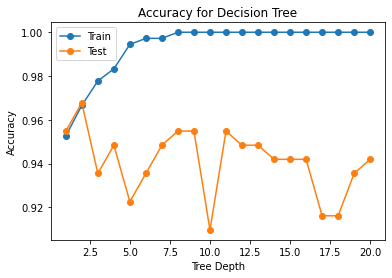

In [17]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.title("Accuracy for Decision Tree")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

## <font color=blue>In the above graph the test accuracy falls after 2nd iteration using Decision Tree classifier, which shows that model is overfitting on the training set.</font>

# <font color=blue>B. K-Nearest Neighbours</font>

In [18]:
# searching for the best parameters
parameters = {
    'n_neighbors': [i for i in range(1, int(np.ceil(np.sqrt(y_train.shape[0]))))],
    'metric':['minkowski','euclidean','manhattan','l1','l2','cityblock','cosine'],
    'algorithm':('ball_tree','kd_tree','brute'), 
    'weights':('distance','uniform'),
    'leaf_size':[10,20,30]
}

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 2268 candidates, totalling 11340 fits
[CV 1/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=best;, score=0.917 total time=   0.0s
[CV 2/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=best;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=best;, score=0.944 total time=   0.0s
[CV 4/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=best;, score=0.917 total time=   0.0s
[CV 5/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=best;, score=0.915 total time=   0.0s
[CV 1/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=random;, score=0.931 total time=   0.1s
[CV 2/5] END criterion=log_loss, max_depth=30, max_features=sqrt, random_state=17, splitter=random;, score=0.931 total time=   0.0s
[CV 3/5] END criteri

[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=4, weights=distance;, score=0.931 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weights=distance;, score=0.944 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weight

[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.917 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weig

[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=8, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=minkowski, n_neighbors=10, weight

[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=16, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=manhattan, n_neighbors=18, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=1, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=1, weights=distance;, score=0.958 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=1, weights=distance;, sco

[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=8, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=8, weights=uniform;, score=0.917 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=10, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=10, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=l1, n_neighbors=10, weights=distance;, score=0.986 total time=   0.0s
[CV 1/

[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=15, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=15, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=16, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=16, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=16, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=16, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=16, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=cityblock, n_neighbors=

[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=10, metric=cosine, n_neighbors=5, weights=distance;, score=nan total time=  

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.944 total time=   0.1s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=minkowski, n_neighbors=3, weights

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=13, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=13, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=13, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=13, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=14, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=14, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=14, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=14

[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=7, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=7, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.1s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=distance;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=euclidean, n_neighbors=14, weights=uniform;, score=0.917 total time=   0.0s
[CV 5

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=6, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=6, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=6, weights=uniform;, score=0.986 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=12, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=12, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=12, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5]

[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=9, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=10, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=10, weights=distance;, score=0.944 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=15, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=15, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=15, weights=distance;, score=0.958 total time=   0.0s
[CV 4/

[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=8, weights=uniform;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=13, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=13, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=13, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=13, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=l2, n_neighbors=13, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5]

[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=cityblock, n_neighbors=12, w

[CV 5/5] END algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=15, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=20, metric=cosine, n_neighbors=15, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=minkowski, n_neighbors=2, weights=uniform;, score=

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=8, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=manhattan, n_neighbors=13

[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=11, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=12, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=12, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=12, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=12, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=l1, n_neighbors=12, weights=distance;, score=0.986 total time=   0.0s
[CV

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=7, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weig

[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=8, weights=distance;, score=nan total time=   0.

[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=11, weights=distance;, score=nan total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=11, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=30, metric=cosine, n_neighbors=11, weights=uniform;, score=nan total time=

[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=6, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=7, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=7, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, metric=euclidean, n_neighbors=7, weights=distance;, scor

[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=2, weights=uniform;, score=0.972 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=manhattan, n_neighbors=3, weights=uniform;, sc

[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=3, weights=uniform;, score=0.958 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=3, weights=uniform;, score=0.986 total time=   0.1s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=distance;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=4, weights=uniform;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=kd_t

[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=uniform;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=l2, n_neighbors=18, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=10, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=10, metric=cityblock, n_neighbors=5, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] EN

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=4, weights=uniform;, score=0.972 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=11, weights=distance;, 

[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=15, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=minkowski, n_neighbors=16, weights=distance;, score=0.931 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=euclidean, n_neighbors=3, weights=distance

[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=distance;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=uniform;, score=0.944 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=2, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tre

[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=13, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=13, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=13, weights=distance;, score=0.972 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=18, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=18, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=18, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=l1, n_neighbors=18, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algor

[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=cityblock, n_neighbors=15, weights=uniform;, score=0.958 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=2, weights=uniform;, score=

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=18, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=18, weights=uniform;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=20, metric=cosine, n_neighbors=7, weights=distance;, score=nan total 

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=10, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=10, weights=uniform;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=11, weights=distance;, score=0.972 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=16, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=euclidean, n_neighbors=16, weights=dist

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=10, weights=uniform;, score=0.986 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=15, weights=uniform;

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=17, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=18, weights=distance

[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=9, weights=distance;, score=0.958 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=12, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=manhattan, n_neighbors=13, weights=distance

[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=10, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=kd_tr

[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.944 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=7, weights=distance;, score=

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=17, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=18, weights=distance;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=l2, n_neighbors=18, weights=distance;, score=0.944 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=5, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=5, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=5, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=5, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=5, weights=distance;, score=0.986 total 

[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=uniform;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=8, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=9, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=kd_tree, leaf_size=30, metric=cityblock, n_neighbors=9, weights=distance;, scor

[CV 2/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.931 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.972 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.931 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=12, weights=uniform;, score=0.958 to

[CV 3/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.958 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.986 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=2, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=2, weights=uniform;, score=0.917 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance;, score=0.972 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=3, weights=distance;, score=0.958 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=euclidean, n_neighbors=4, weights=distance;, score=0.931 tota

[CV 5/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=5, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=6, weights=distance;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=manhattan, n_neighbors=9, weights=distance;, score=0.986 total t

[CV 5/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=5, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=5, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=5, weights=uniform;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=5, weights=uniform;, score=0.972 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=6, weights=distance;, score=0.972 total time=   0.1s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=6, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=6, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, 

[CV 4/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=11, weights=uniform;, score=0.958 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=12, weights=distance;, score=0.917 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=12, weights=distance;, score=0.944 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=13, weights=distance;, score=0.917 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=13, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=13, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=l1, n_neighbors=13, weights=distance;, score=0.972 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf

[CV 5/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=3, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=4, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=4, weights=distance;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=5, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=5, weights=uniform;, score=0.944 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=5, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=5, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=7, weights=distance;, score=0.944 total time=   0.0s
[CV 2/5] END

[CV 5/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=11, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=11, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=11, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=13, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=13, weights=distance;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=13, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=10, metric=cosine, n_neighbors=13, weights=distance;, score=0.972 total time=   0.0s
[CV

[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=2, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=2, weights=distance;, score=0.917 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=3, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=4, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=4, weights=distance;, score=0.931 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=5, weights=uniform;, score=0.931 total 

[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=6, weights=uniform;, score=0.917 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=8, weights=distance;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=minkowski, n_neighbors=9, weights=uniform;, score=0.917 total t

[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.931 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=9, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=manhattan, n_neighbors=10, weights=distance;, score=0.944 total 

[CV 5/5] END algorithm=brute, leaf_size=20, metric=l1, n_neighbors=16, weights=uniform;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=uniform;, score=0.931 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=2, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, m

[CV 4/5] END algorithm=brute, leaf_size=20, metric=l2, n_neighbors=17, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=2, weights=distance;, score=0.917 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=2, weights=uniform;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=2, weights=uniform;, score=0.944 total time=   0.2s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=3, weights=distance;, score=0.972 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=3, weights=uniform;, score=0.917 total time=   

[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=6, weights=uniform;, score=0.931 total time=   0.2s
[CV 5/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=7, weights=distance;, score=0.986 total time=   0.2s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=7, weights=uniform;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=7, weights=uniform;, score=0.944 total time=   0.3s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=9, weights=distance;, score=0.931 total time=   0.2s
[CV 2/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=9, weights=distance;, score=0.944 total time=   0.1s
[CV 3/5] END algorithm=brute, leaf_size=20, metric=cityblock, n_neighbors=9, weights=distance;, score=0.958 total t

[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.944 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=16, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=minkowski, n_neighbors=17, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=euclidean, n_neighbors=1, weights=uniform;, score=0.931 

[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=uniform;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=uniform;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=11, weights=distance;, score=0.917 total time=   0.1s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=11, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=11, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=11, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_s

[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=distance;, score=0.958 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=distance;, score=0.986 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=10, weights=uniform;, score=0.903 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=13, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=13, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=13, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, lea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 11340.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 200, in fit
    return self._fit(X, y)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 446, 

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': [10, 20, 30],
                         'metric': ['minkowski', 'euclidean', 'manhattan', 'l1',
                                    'l2', 'cityblock', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18],
                         'weights': ('distance', 'uniform')},
             scoring='accuracy', verbose=3)

In [19]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'algorithm': 'brute', 'leaf_size': 10, 'metric': 'cosine', 'n_neighbors': 7, 'weights': 'uniform'} 
 0.9610719874804381


-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  5  12]] 

-----------------------------------------------

% of Correctly classified instances:  0.9677 
% of Incorrectly classified instances:  0.0323 

-----------------------------------------------
Accuracy: 0.9677
Precision: 0.9689
Recall: 0.9677
F1 Score: 0.9652
Cohen Kappa: 0.8104
Matthews Corrcoef: 0.9677
ROC AUC: 0.993
Train Time(s) 0.0021567344665527344
Train Time(s) 0.024272918701171875


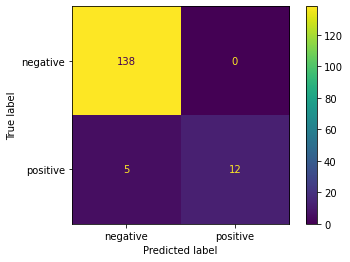

In [20]:
start_train = time.time()
# Train the model
knn = KNeighborsClassifier(algorithm='brute',leaf_size=10,metric='cosine',n_neighbors=7,weights='uniform')
knn.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Train Time(s)",test_time)

### <font color=green>Train and Test accuracy for K Neighbours Classifier.</font>

In [21]:
train_scores, test_scores = list(), list()

for i in values:
    clf = KNeighborsClassifier(n_neighbors=i)
    # Train the model
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred = clf.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))                                                                              

>1, train: 1.000, test: 0.961
>2, train: 0.955, test: 0.968
>3, train: 0.972, test: 0.968
>4, train: 0.958, test: 0.961
>5, train: 0.964, test: 0.961
>6, train: 0.961, test: 0.961
>7, train: 0.958, test: 0.968
>8, train: 0.955, test: 0.961
>9, train: 0.955, test: 0.968
>10, train: 0.961, test: 0.961
>11, train: 0.958, test: 0.968
>12, train: 0.955, test: 0.961
>13, train: 0.953, test: 0.961
>14, train: 0.953, test: 0.961
>15, train: 0.950, test: 0.961
>16, train: 0.955, test: 0.955
>17, train: 0.955, test: 0.955
>18, train: 0.953, test: 0.955
>19, train: 0.953, test: 0.961
>20, train: 0.950, test: 0.955


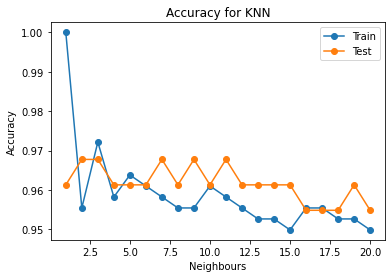

In [22]:
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.title("Accuracy for KNN")
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
plt.show()

### <font color=blue>In the above graph the test accuracy reached its peak in the 2nd iteration (consistent for 3rd, 7th, 9th, and 11th iteration) using the test data. Even the training accurancy shows a  decline. This time we compared the accuracy using KNeighborsClassifier</font>

### <font color=green>Converting categorical values to binary. 1 means negative, 0 means positive.</font>

In [23]:
DF1 = pd.get_dummies(Original_DF["class"])
 
# Binary Data is Concatenated into Dataframe
DF2 = pd.concat((DF1, Original_DF), axis=1)
# Gendercolumn is dropped
DF2 = DF2.drop(["class"], axis=1)
 
# We want Positive = 0 and Negative = 1 So we drop Positive column here
DF2 = DF2.drop(["positive"], axis=1)
 
# Rename the Column
DF2.rename(columns={"negative": "class"},inplace=True)

In [24]:
x_1,y_1 = DF2.loc[:,DF2.columns != 'class'], DF2.loc[:,'class']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size=0.3, random_state=1)

class_labels_1 = y_train_1.unique()

In [25]:
train_scores, test_scores = list(), list()
values =[i for i in range(1,21)]
for i in values:
    clf = KNeighborsClassifier(n_neighbors=i)
    # Train the model
    clf.fit(X_train_1, y_train_1)
    train_y_pred_1 = clf.predict(X_train_1)
    train_acc = metrics.log_loss(y_train_1, train_y_pred_1)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred_1 = clf.predict(X_test_1)
    test_acc = metrics.log_loss(y_test_1, test_y_pred_1)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))      

>1, train: 0.000, test: 1.337
>2, train: 0.577, test: 2.451
>3, train: 0.962, test: 1.114
>4, train: 0.866, test: 1.114
>5, train: 1.251, test: 1.337
>6, train: 1.347, test: 1.560
>7, train: 1.443, test: 1.114
>8, train: 1.443, test: 1.114
>9, train: 1.539, test: 1.114
>10, train: 1.636, test: 1.114
>11, train: 1.443, test: 1.114
>12, train: 1.539, test: 1.114
>13, train: 1.636, test: 1.337
>14, train: 1.732, test: 1.337
>15, train: 1.732, test: 1.337
>16, train: 1.732, test: 1.114
>17, train: 1.539, test: 1.560
>18, train: 1.539, test: 1.337
>19, train: 1.636, test: 1.337
>20, train: 1.539, test: 1.114


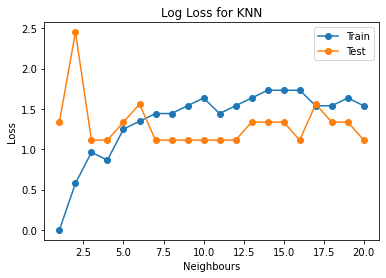

In [26]:
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title("Log Loss for KNN")
plt.xlabel('Neighbours')
plt.ylabel('Loss')
plt.legend()
plt.show()

# <font color=blue>C. Logistic Regression</font>

In [27]:
# searching for the best parameters
parameters = {
    'penalty': ['l1','l2'],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'C':[0.001,0.01,0.1,1.0],
    'multi_class': ['auto','ovr','multinomial']
}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=14, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=14, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=14, weights=distance;, score=0.972 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=14, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=14, weights=uniform;, score=0.917 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=17, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=17, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l1, n_neighbors=17, weights=distance;, s

[CV 3/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=7, weights=uniform;, score=0.972 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=10, weights=distance;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=l2, n_neighbors=10, weights=distance;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=3

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


_neighbors=18, weights=distance;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=18, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=18, weights=distance;, score=0.958 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=18, weights=distance;, score=0.972 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=18, weights=distance;, score=0.986 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=18, weights=uniform;, score=0.917 total time=   0.1s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=3, weights=distance;, score=0.931 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=3, weights=distance;, score=0.917 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metr

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/dus

[CV 2/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=distance;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=distance;, score=0.944 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=distance;, score=0.917 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=1, weights=uniform;, score=0.944 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cityblock, n_neighbors=4, weights=distance;, score=0.958 total 

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
220 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [28]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'} 
 0.9470657276995306


-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  6  11]] 

-----------------------------------------------

% of Correctly classified instances:  0.9613 
% of Incorrectly classified instances:  0.0387 

-----------------------------------------------
Accuracy: 0.9613
Precision: 0.9629
Recall: 0.9613
F1 Score: 0.9576
Cohen Kappa: 0.7655
Matthews Corrcoef: 0.9613
ROC AUC: 0.9604
Train Time(s) 0.018677949905395508
Train Time(s) 0.004472255706787109


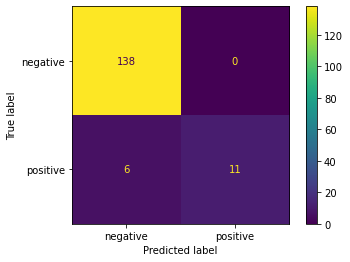

In [29]:
start_train = time.time()
# Train the model
lr = LogisticRegression(penalty='l1',solver='liblinear',C=1.0,multi_class='auto')
lr.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Train Time(s)",test_time)

### <font color=green>Train and Test accuracy for Logistic Regression Classifier</font>

In [30]:
train_scores, test_scores = list(), list()

values = [i for i in range(1,21)]
for i in values:
    clf = LogisticRegression(max_iter = i,solver='liblinear')
    # Train the model
    clf.fit(X_train_1, y_train_1)
    train_y_pred_1 = clf.predict(X_train_1)
    train_acc = metrics.accuracy_score(y_train_1, train_y_pred_1)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred_1 = clf.predict(X_test_1)
    test_acc = metrics.accuracy_score(y_test_1, test_y_pred_1)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))                                                                              

>1, train: 0.905, test: 0.890
>2, train: 0.905, test: 0.890
>3, train: 0.905, test: 0.890
>4, train: 0.908, test: 0.903
>5, train: 0.908, test: 0.903
>6, train: 0.908, test: 0.903
>7, train: 0.908, test: 0.903
>8, train: 0.908, test: 0.903
>9, train: 0.908, test: 0.903
>10, train: 0.908, test: 0.903
>11, train: 0.908, test: 0.903
>12, train: 0.908, test: 0.903
>13, train: 0.908, test: 0.903
>14, train: 0.908, test: 0.903
>15, train: 0.908, test: 0.903
>16, train: 0.908, test: 0.903
>17, train: 0.908, test: 0.903
>18, train: 0.908, test: 0.903
>19, train: 0.908, test: 0.903
>20, train: 0.908, test: 0.903


/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/p

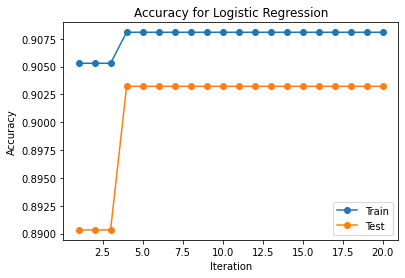

In [31]:
# plot of train and test accuracy scores for logistic regression model
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.title("Accuracy for Logistic Regression")
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

In [32]:
train_scores, test_scores = list(), list()
values =[i for i in range(1,21)]
for i in values:
    clf = LogisticRegression(max_iter = i,solver='liblinear')
    # Train the model
    clf.fit(X_train_1, y_train_1)
    train_y_pred_1 = clf.predict(X_train_1)
    train_acc = metrics.log_loss(y_train_1, train_y_pred_1)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred_1 = clf.predict(X_test_1)
    test_acc = metrics.log_loss(y_test_1, test_y_pred_1)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))      

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dushyantsapre/opt/anaconda3/lib/p

>1, train: 3.271, test: 3.788
>2, train: 3.271, test: 3.788
>3, train: 3.271, test: 3.788
>4, train: 3.175, test: 3.343
>5, train: 3.175, test: 3.343
>6, train: 3.175, test: 3.343
>7, train: 3.175, test: 3.343
>8, train: 3.175, test: 3.343
>9, train: 3.175, test: 3.343
>10, train: 3.175, test: 3.343
>11, train: 3.175, test: 3.343
>12, train: 3.175, test: 3.343
>13, train: 3.175, test: 3.343
>14, train: 3.175, test: 3.343
>15, train: 3.175, test: 3.343
>16, train: 3.175, test: 3.343
>17, train: 3.175, test: 3.343
>18, train: 3.175, test: 3.343
>19, train: 3.175, test: 3.343
>20, train: 3.175, test: 3.343


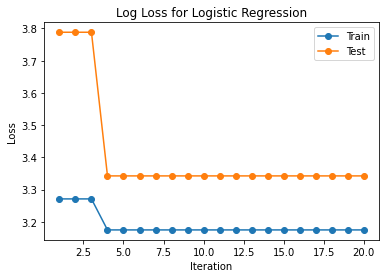

In [33]:
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title("Log Loss for Logistic Regression")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

## Q5. Ensemble Models

## <font color=blue>A. Random Forest</font>

In [34]:
# searching for the best parameters
parameters = {
    'criterion':['gini','entropy','log_loss'],
    'max_features':['sqrt', 'log2'],
    'oob_score':['True','False'],
    'bootstrap':['True','False'],
    'max_depth':[5,10,15,20,25,30]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=11, weights=uniform;, score=0.972 total time=   0.1s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=distance;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=uniform;, score=0.917 total time=   0.0s
[CV 2/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=uniform;, score=0.931 total time=   0.0s
[CV 3/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=uniform;, score=0.958 total time=   0.0s
[CV 5/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbors=13, weights=uniform;, score=0.972 total time=   0.0s
[CV 1/5] END algorithm=brute, leaf_size=30, metric=cosine, n_neighbo

[CV 5/5] END C=0.001, multi_class=auto, penalty=l2, solver=sag;, score=0.915 total time=   0.0s
[CV 1/5] END C=0.001, multi_class=auto, penalty=l2, solver=saga;, score=0.903 total time=   0.0s
[CV 2/5] END C=0.001, multi_class=auto, penalty=l2, solver=saga;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.001, multi_class=auto, penalty=l2, solver=saga;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.001, multi_class=ovr, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 4/5] END C=0.001, multi_class=ovr, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 5/5] END C=0.001, multi_class=ovr, penalty=l1, solver=saga;, score=0.915 total time=   0.0s
[CV 1/5] END C=0.001, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.903 total time=   0.0s
[CV 2/5] END C=0.001, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.001, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.903 total time=   0.0s
[CV 4/5] END C=0.001, 

[CV 2/5] END C=0.001, multi_class=auto, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 2/5] END C=0.001, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.001, multi_class=auto, penalty=l2, solver=newton-cg;, score=0.903 total time=   0.0s
[CV 5/5] END C=0.001, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.915 total time=   0.0s
[CV 1/5] END C=0.001, multi_class=auto, penalty=l2, solver=liblinear;, score=0.903 total time=   0.0s
[CV 1/5] END C=0.001, multi_class=auto, penalty=l2, solver=sag;, score=0.903 total time=   0.0s
[CV 2/5] END C=0.001, multi_class=auto, penalty=l2, solver=sag;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.001, multi_class=auto, penalty=l2, solver=sag;, score=0.903 total time=   0.0s
[CV 4/5] END C=0.001, multi_class=auto, penalty=l2, solver=sag;, score=0.903 total time=   0.0s
[CV 5/5] END C=0.001, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.915 total time=   0.0s
[CV 1/5] END C

[CV 1/5] END C=0.01, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.0s
[CV 2/5] END C=0.01, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.0s
[CV 3/5] END C=0.01, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.0s
[CV 4/5] END C=0.01, multi_class=auto, penalty=l2, solver=lbfgs;, score=0.903 total time=   0.0s
[CV 4/5] END C=0.01, multi_class=ovr, penalty=l2, solver=saga;, score=0.903 total time=   0.0s
[CV 5/5] END C=0.01, multi_class=ovr, penalty=l2, solver=saga;, score=0.915 total time=   0.0s
[CV 1/5] END C=0.01, multi_class=multinomial, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, multi_class=multinomial, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, multi_class=multinomial, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, multi_class=multinomial, penalty=l1, solver=newton-cg;, score=nan total time=   0.0

[CV 4/5] END C=1.0, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, multi_class=auto, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, multi_class=auto, penalty=l1, solver=saga;, score=0.917 total time=   0.1s
[CV 2/5] END C=1.0, multi_class=auto, penalty=l1, solver=saga;, score=0.903 total time=   0.0s
[CV 5/5] END C=1.0, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, multi_class=ovr, penalty=l1, solver=liblinea

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'log2'],
                         'oob_score': ['True', 'False']},
             scoring='accuracy', verbose=3)

In [35]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'bootstrap': 'True', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'oob_score': 'False'} 
 0.963849765258216


-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  6  11]] 

-----------------------------------------------

% of Correctly classified instances:  0.9613 
% of Incorrectly classified instances:  0.0387 

-----------------------------------------------
Accuracy: 0.9613
Precision: 0.9629
Recall: 0.9613
F1 Score: 0.9576
Cohen Kappa: 0.7655
Matthews Corrcoef: 0.9613
ROC AUC: 0.9919
Train Time(s) 0.4054450988769531
Test Time(s) 0.04755711555480957


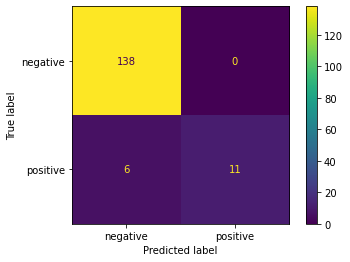

In [36]:
start_train = time.time()
# Train the model
rfc = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=5, max_features='sqrt', oob_score=False)
rfc.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Test Time(s)",test_time)

### <font color=green>Train and Test accuracy for Random Forest Classifier.</font>

In [37]:
train_scores, test_scores = list(), list()

values = [i for i in range(1, 51)]  

for i in values:
    clf = RandomForestClassifier(max_depth=i)
    
    # Train the model
    clf.fit(X_train, y_train)
    train_y_pred = clf.predict(X_train)
    train_acc = metrics.accuracy_score(y_train, train_y_pred)
    train_scores.append(train_acc)    
   
    # Test the model
    test_y_pred = clf.predict(X_test)
    test_acc = metrics.accuracy_score(y_test, test_y_pred)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))                                                                              

>1, train: 0.908, test: 0.923
>2, train: 0.961, test: 0.955
>3, train: 0.975, test: 0.968
>4, train: 0.981, test: 0.961
>5, train: 0.986, test: 0.968
>6, train: 0.992, test: 0.974
>7, train: 0.994, test: 0.974
>8, train: 1.000, test: 0.974
>9, train: 1.000, test: 0.968
>10, train: 1.000, test: 0.968
>11, train: 1.000, test: 0.968
>12, train: 1.000, test: 0.961
>13, train: 1.000, test: 0.974
>14, train: 1.000, test: 0.974
>15, train: 1.000, test: 0.968
>16, train: 1.000, test: 0.974
>17, train: 1.000, test: 0.961
>18, train: 1.000, test: 0.961
>19, train: 1.000, test: 0.974
>20, train: 1.000, test: 0.974
>21, train: 1.000, test: 0.968
>22, train: 1.000, test: 0.968
>23, train: 1.000, test: 0.968
>24, train: 1.000, test: 0.968
>25, train: 1.000, test: 0.961
>26, train: 1.000, test: 0.974
>27, train: 1.000, test: 0.968
>28, train: 1.000, test: 0.968
>29, train: 1.000, test: 0.968
>30, train: 1.000, test: 0.974
>31, train: 1.000, test: 0.968
>32, train: 1.000, test: 0.968
>33, train: 1.000

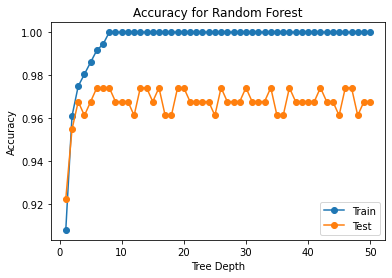

In [38]:
# plot of train and test accuracy scores for random forest model
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.title("Accuracy for Random Forest")
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

## <font color=blue>B. AdaBoost</font>

In [39]:
# searching for the best parameters
parameters = {
    'base_estimator':[SVC(),SGDClassifier(),GaussianNB(),BernoulliNB()],
    'n_estimators':[i for i in range(1,25)],
    'learning_rate':[j for j in range(1,5)],
    'algorithm':['SAMME', 'SAMME.R']
}

abc = AdaBoostClassifier()
clf = GridSearchCV(abc, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=15, max_features=sqrt, oob_score=False;, score=0.958 total time=   1.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, oob_score=True;, score=0.972 total time=   1.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=15, max_features=log2, oob_score=False;, score=0.944 total time=   1.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, oob_score=True;, score=0.958 total time=   0.8s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, oob_score=True;, score=0.972 total time=   0.7s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, oob_score=False;, score=0.972 total time=   0.7s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, oob_score=True;, score=0.931 total time=   0.7s
[CV 3/5] END bootstrap=True, criterion=gini, max_de

[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, oob_score=True;, score=0.931 total time=   0.6s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, oob_score=True;, score=0.958 total time=   0.6s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, oob_score=False;, score=0.958 total time=   0.8s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, oob_score=True;, score=0.958 total time=   0.7s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=15, max_features=sqrt, oob_score=False;, score=0.944 total time=   0.7s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, oob_score=True;, score=0.931 total time=   0.7s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, oob_score=True;, score=0.958 total time=   0.6s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=15, max_features=log2, oob_score=Fals

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 5/5] END bootstrap=True, criterion=log_loss, max_depth=5, max_features=sqrt, oob_score=False;, score=0.930 total time=   0.7s
[CV 4/5] END bootstrap=True, criterion=log_loss, max_depth=5, max_features=log2, oob_score=True;, score=0.958 total time=   1.0s
[CV 3/5] END bootstrap=True, criterion=log_loss, max_depth=5, max_features=log2, oob_score=False;, score=0.958 total time=   0.9s
[CV 2/5] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, oob_score=True;, score=0.944 total time=   0.8s
[CV 1/5] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, oob_score=False;, score=0.931 total time=   1.0s
[CV 5/5] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=sqrt, oob_score=False;, score=0.958 total time=   1.1s
[CV 4/5] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=log2, oob_score=True;, score=0.958 total time=   1.1s
[CV 3/5] END bootstrap=True, criterion=log_loss, max_depth=10, max_features=log2, oob_sco

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

re=False;, score=0.972 total time=   1.3s
[CV 2/5] END bootstrap=True, criterion=log_loss, max_depth=15, max_features=sqrt, oob_score=True;, score=0.931 total time=   0.9s
[CV 1/5] END bootstrap=True, criterion=log_loss, max_depth=15, max_features=sqrt, oob_score=False;, score=0.931 total time=   1.1s
[CV 5/5] END bootstrap=True, criterion=log_loss, max_depth=15, max_features=sqrt, oob_score=False;, score=0.972 total time=   0.8s
[CV 4/5] END bootstrap=True, criterion=log_loss, max_depth=15, max_features=log2, oob_score=True;, score=0.958 total time=   1.0s
[CV 3/5] END bootstrap=True, criterion=log_loss, max_depth=15, max_features=log2, oob_score=False;, score=0.972 total time=   0.5s
[CV 2/5] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, oob_score=True;, score=0.944 total time=   0.8s
[CV 1/5] END bootstrap=True, criterion=log_loss, max_depth=20, max_features=sqrt, oob_score=False;, score=0.917 total time=   0.7s
[CV 5/5] END bootstrap=True, criterion=log_l

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 5/5] END bootstrap=False, criterion=gini, max_depth=5, max_features=log2, oob_score=False;, score=0.944 total time=   0.7s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, oob_score=True;, score=0.944 total time=   0.9s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=sqrt, oob_score=False;, score=0.972 total time=   1.5s
[CV 2/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, oob_score=True;, score=0.917 total time=   1.7s
[CV 1/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, oob_score=False;, score=0.931 total time=   1.1s
[CV 5/5] END bootstrap=False, criterion=gini, max_depth=10, max_features=log2, oob_score=False;, score=0.958 total time=   2.1s
[CV 4/5] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, oob_score=True;, score=0.931 total time=   0.9s
[CV 3/5] END bootstrap=False, criterion=gini, max_depth=15, max_features=sqrt, oob_score=False;, score=0.958

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, oob_score=True;, score=0.944 total time=   0.5s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, oob_score=False;, score=0.917 total time=   0.5s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=20, max_features=log2, oob_score=False;, score=0.972 total time=   0.5s
[CV 4/5] END bootstrap=False, criterion=entropy, max_depth=25, max_features=sqrt, oob_score=True;, score=0.958 total time=   0.5s
[CV 3/5] END bootstrap=False, criterion=entropy, max_depth=25, max_features=sqrt, oob_score=False;, score=0.958 total time=   0.6s
[CV 2/5] END bootstrap=False, criterion=entropy, max_depth=25, max_features=log2, oob_score=True;, score=0.944 total time=   0.8s
[CV 1/5] END bootstrap=False, criterion=entropy, max_depth=25, max_features=log2, oob_score=False;, score=0.944 total time=   0.6s
[CV 5/5] END bootstrap=False, criterion=entropy, max_depth=25, max_features=log2, oob_

[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, oob_score=True;, score=0.972 total time=   1.1s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=15, max_features=log2, oob_score=False;, score=0.917 total time=   1.1s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, oob_score=True;, score=0.917 total time=   1.1s
[CV 5/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, oob_score=True;, score=0.972 total time=   0.9s
[CV 4/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=sqrt, oob_score=False;, score=0.958 total time=   1.2s
[CV 3/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, oob_score=True;, score=0.958 total time=   1.0s
[CV 2/5] END bootstrap=False, criterion=log_loss, max_depth=20, max_features=log2, oob_score=False;, score=0.931 total time=   0.9s
[CV 1/5] END bootstrap=False, criterion=log_loss, max_depth=25, max_features=sqr

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=7;, score=0.903 total time=   0.3s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=10;, score=0.903 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=10;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=11;, score=0.903 total time=   0.1s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=11;, score=0.903 total time=   0.5s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=14;, score=0.903 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=14;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=1, n_estimators=15;, score=0.903 total time=   0.1s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learn

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=11;, score=0.903 total time=   0.6s
[CV 3/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=12;, score=0.097 total time=   0.5s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=13;, score=0.903 total time=   0.6s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=14;, score=0.097 total time=   0.7s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=14;, score=0.085 total time=   1.2s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=15;, score=0.903 total time=   0.7s
[CV 3/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=16;, score=0.097 total time=   0.7s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=17;, score=0.903 total time=   0.7s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), lear

onda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.

ning_rate=2, n_estimators=18;, score=0.097 total time=   0.9s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=18;, score=0.085 total time=   1.1s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=19;, score=0.903 total time=   0.9s
[CV 3/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=20;, score=0.097 total time=   0.7s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=21;, score=0.903 total time=   0.7s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=22;, score=0.097 total time=   0.7s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=22;, score=0.085 total time=   0.7s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=23;, score=0.903 total time=   0.7s
[CV 3/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=2, n_estimators=24;, score=0.903 total time=  

 learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dus

ng_rate=3, n_estimators=7;, score=0.903 total time=   0.2s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=8;, score=0.097 total time=   0.2s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=9;, score=0.903 total time=   0.2s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=9;, score=0.915 total time=   0.2s
[CV 4/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=10;, score=0.903 total time=   0.3s
[CV 3/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=11;, score=0.903 total time=   0.3s
[CV 2/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=12;, score=0.903 total time=   0.3s
[CV 1/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=13;, score=0.903 total time=   0.2s
[CV 5/5] END algorithm=SAMME, base_estimator=SVC(), learning_rate=3, n_estimators=13;, score=0.915 total time=   0.6s


[CV 4/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=14;, score=0.903 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=14;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=15;, score=0.903 total time=   0.1s
[CV 2/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=15;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=17;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=18;, score=0.903 total time=   0.1s
[CV 2/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=18;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=18;, score=0

[CV 2/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=3;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=4;, score=0.097 total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=4;, score=0.097 total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=4;, score=0.097 total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=4;, score=0.085 total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=6;, score=0.097 total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=6;, score=0.085 total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=SGDClassifier(), learning_rate=3, n_estimators=7;, score=0.903 tot

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causi

[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=8;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=8;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=8;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=8;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=9;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=9;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=9;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=9;, score=nan total time=   0.0s
[CV 5/5] END algorithm=S

_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 8, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packa

AMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=9;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=10;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=11;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estima

[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=7;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=2, n_estimators=7;, score=nan total time=   0.0s
[CV 3/5] END algorithm=S

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:675: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:506: UserWarning: Sample weights have reached infinite values, at iteration 5, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklea

[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=4;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=GaussianNB(), learning_rate=3, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=S

[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=5;, score=0.915 total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=6;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=6;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=6;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=16;, score=0.903 total time=   0.1s
[CV 3/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=16;, score=0.903 total time=   0.1s
[CV 4/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=16;, score=0.903 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=16;, score=0.915 total time=   0

[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=19;, score=0.085 total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=20;, score=0.097 total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=23;, score=0.097 total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=23;, score=0.097 total time=   0.1s
[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=23;, score=0.085 total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=24;, score=0.097 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=1, n_estimators=7;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=1, n_estimators=7;, score=nan total time=   0.0s
[CV 5/5] E

[CV 2/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=20;, score=0.097 total time=   0.0s
[CV 3/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=20;, score=0.097 total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=20;, score=0.097 total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=20;, score=0.085 total time=   0.0s
[CV 4/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=22;, score=0.097 total time=   0.0s
[CV 5/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=22;, score=0.085 total time=   0.0s
[CV 1/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=23;, score=0.097 total time=   0.0s
[CV 2/5] END algorithm=SAMME, base_estimator=BernoulliNB(), learning_rate=4, n_estimators=23;, score=0.097 total time=

[CV 1/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=3, n_estimators=8;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=3;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=3;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=3;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=4;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=4;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=4;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_rate=4, n_estimators=4;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SVC(), learning_r

[CV 1/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=5;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=6;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=6;, score=nan tot

[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=22;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=22;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=22;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=23;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=23;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=23;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=23;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=2, n_estimators=23;, score

[CV 2/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=10;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=10;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=10;, score=nan total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=10;, score=nan total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=11;, score=nan total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=11;, score=nan total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=11;, score=nan total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=SGDClassifier(), learning_rate=4, n_estimators=11;, score

[CV 3/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=11;, score=0.264 total time=   0.1s
[CV 4/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=11;, score=0.181 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=11;, score=0.282 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=12;, score=0.097 total time=   0.1s
[CV 2/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=12;, score=0.889 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=12;, score=0.097 total time=   0.1s
[CV 4/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=12;, score=0.125 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=12;, score=0.113 tot

/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1440 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py", line 506, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/dushyantsapre/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weigh

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator': [SVC(), SGDClassifier(),
                                            GaussianNB(), BernoulliNB()],
                         'learning_rate': [1, 2, 3, 4],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24]},
             scoring='accuracy', verbose=3)

In [40]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'algorithm': 'SAMME', 'base_estimator': SGDClassifier(), 'learning_rate': 1, 'n_estimators': 7} 
 0.9415492957746479


-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  8   9]] 

-----------------------------------------------

% of Correctly classified instances:  0.9484 
% of Incorrectly classified instances:  0.0516 

-----------------------------------------------
Accuracy: 0.9484
Precision: 0.9512
Recall: 0.9484
F1 Score: 0.9412
Cohen Kappa: 0.667
Matthews Corrcoef: 0.9484
ROC AUC: 0.9194
Train Time(s) 0.03215813636779785
Test Time(s) 0.008502960205078125


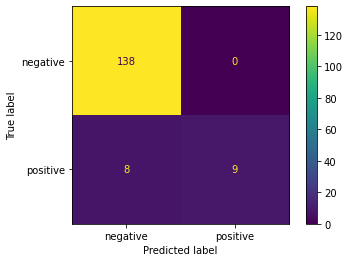

In [41]:
start_train = time.time()
# Train the model
abc = AdaBoostClassifier(base_estimator=SGDClassifier(),algorithm='SAMME',learning_rate=1.0,n_estimators=11)
abc.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = abc.predict(X_test)
y_pred_proba = abc.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Test Time(s)",test_time)

## <font color=blue>C. Bagging</font>

In [42]:
# searching for the best parameters
parameters = {
    'base_estimator':[DecisionTreeClassifier(),SVC(),SGDClassifier(),GaussianNB(),BernoulliNB()],
    'n_estimators':[i for i in range(1,25)],
    'max_features':[6]
}

Bagging = BaggingClassifier()
clf = GridSearchCV(Bagging, parameters,refit = True, verbose = 3,n_jobs=-1, scoring = 'accuracy')
clf.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 4/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=11;, score=0.181 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=11;, score=0.282 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=12;, score=0.097 total time=   0.1s
[CV 2/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=12;, score=0.861 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=12;, score=0.097 total time=   0.1s
[CV 4/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=12;, score=0.125 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=12;, score=0.113 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=G

[CV 1/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=19;, score=0.236 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=2, n_estimators=19;, score=0.917 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=21;, score=0.236 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=21;, score=0.903 total time=   0.2s
[CV 3/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=21;, score=0.264 total time=   0.2s
[CV 4/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=21;, score=0.181 total time=   0.2s
[CV 5/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=21;, score=0.282 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=3, n_estimators=22;, score=0.097 tot

[CV 2/5] END algorithm=SAMME.R, base_estimator=GaussianNB(), learning_rate=4, n_estimators=24;, score=0.542 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=1;, score=0.903 total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=2;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=2;, score=0.915 total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=3;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=4;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=4;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=1, n_estimators=5;, score=0.915 tot

[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=18;, score=0.097 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=18;, score=0.097 total time=   0.1s
[CV 3/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=18;, score=0.097 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=21;, score=0.903 total time=   0.3s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=21;, score=0.903 total time=   0.2s
[CV 3/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=21;, score=0.903 total time=   0.2s
[CV 4/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=21;, score=0.903 total time=   0.2s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=24;, score=0

GridSearchCV(estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(), SVC(),
                                            SGDClassifier(), GaussianNB(),
                                            BernoulliNB()],
                         'max_features': [6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24]},
             scoring='accuracy', verbose=3)

In [43]:
# best Parameter setting and Accuracy Score
print(clf.best_params_,'\n',clf.best_score_)

{'base_estimator': DecisionTreeClassifier(), 'max_features': 6, 'n_estimators': 7} 
 0.9610328638497652


-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  7  10]] 

-----------------------------------------------

% of Correctly classified instances:  0.9548 
% of Incorrectly classified instances:  0.0452 

-----------------------------------------------
Accuracy: 0.9548
Precision: 0.957
Recall: 0.9548
F1 Score: 0.9495
Cohen Kappa: 0.7178
Matthews Corrcoef: 0.9548
ROC AUC: 0.938
Train Time(s) 0.24402689933776855
Test Time(s) 0.2823069095611572


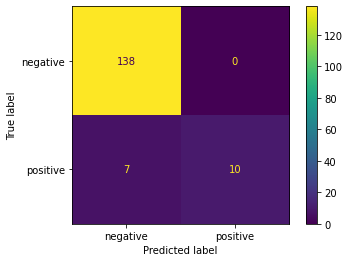

In [44]:
start_train = time.time()
# Train the model
Bagging = BaggingClassifier(base_estimator=SVC(),max_features=6,n_estimators=18)
Bagging.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = Bagging.predict(X_test)
y_pred_proba = Bagging.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

    
print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Test Time(s)",test_time)

## <font color=blue>D. Stacking</font>

-----------------------------------------------
Confusion Matrix Raw Format:
 [[138   0]
 [  4  13]] 

-----------------------------------------------

% of Correctly classified instances:  0.9742 
% of Incorrectly classified instances:  0.0258 

-----------------------------------------------
Accuracy: 0.9742
Precision: 0.9749
Recall: 0.9742
F1 Score: 0.9727
Cohen Kappa: 0.8527
Matthews Corrcoef: 0.9742
ROC AUC: 0.965
Train Time(s) 0.47913289070129395
Test Time(s) 0.01787710189819336


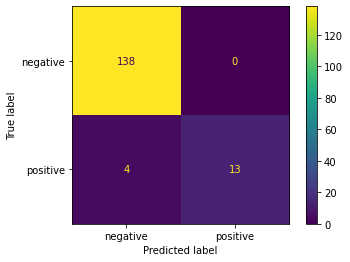

In [45]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', LinearSVC(random_state=42))]

start_train = time.time()
# Train the model
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Test Time(s)",test_time)

## <font color=blue>E. Voting</font>

In [46]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

-----------------------------------------------
Confusion Matrix Raw Format:
 [[136   2]
 [  2  15]] 

-----------------------------------------------

% of Correctly classified instances:  0.9742 
% of Incorrectly classified instances:  0.0258 

-----------------------------------------------
Accuracy: 0.9742
Precision: 0.9742
Recall: 0.9742
F1 Score: 0.9742
Cohen Kappa: 0.8679
Matthews Corrcoef: 0.9742
ROC AUC: 0.9915
Train Time(s) 0.26145505905151367
Test Time(s) 0.05877399444580078


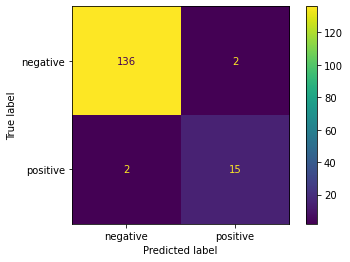

[CV 3/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=4;, score=0.958 total time=   0.0s
[CV 4/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=4;, score=0.944 total time=   0.0s
[CV 5/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=4;, score=0.958 total time=   0.0s
[CV 4/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=6;, score=0.944 total time=   0.1s
[CV 5/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=6;, score=0.972 total time=   0.1s
[CV 1/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=7;, score=0.917 total time=   0.1s
[CV 2/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=7;, score=0.917 total time=   0.1s
[CV 5/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=9;, score=0.958 total time=   0.1s
[CV 1/5] END base_estimator=SGDClassifier(), max_features=6, n_estimators=10;, score=0.944 total time=   0.1s
[CV 2/5] END base_

[CV 5/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=5;, score=0.972 total time=   0.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=6;, score=0.958 total time=   0.0s
[CV 2/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=6;, score=0.903 total time=   0.1s
[CV 3/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=6;, score=0.958 total time=   0.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=9;, score=0.917 total time=   0.1s
[CV 2/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=9;, score=0.931 total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=9;, score=0.944 total time=   0.1s
[CV 4/5] END base_estimator=DecisionTreeClassifier(), max_features=6, n_estimators=9;, score=0.944 total time=   0.0s
[CV 2/5] END base_estimator=DecisionTreeClassifier(), ma

[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=5;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=5;, score=0.903 total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=5;, score=0.903 total time=   0.0s
[CV 3/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=7;, score=0.903 total time=   0.0s
[CV 4/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=7;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=7;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=8;, score=0.097 tot

[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=23;, score=0.915 total time=   0.2s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=2, n_estimators=24;, score=0.097 total time=   0.2s
[CV 4/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=6;, score=0.097 total time=   0.1s
[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=6;, score=0.085 total time=   0.0s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=7;, score=0.903 total time=   0.0s
[CV 2/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=7;, score=0.903 total time=   0.0s
[CV 5/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=9;, score=0.915 total time=   0.1s
[CV 1/5] END algorithm=SAMME.R, base_estimator=BernoulliNB(), learning_rate=3, n_estimators=10;, score=0.097 

In [47]:
start_train = time.time()
# Train the model
clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

clf.fit(X_train, y_train)
stop_train = time.time()
train_time= stop_train - start_train
        
# Test the model
start_test = time.time()
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
stop_test = time.time()
test_time= stop_test - start_test

print("-----------------------------------------------")
results = confusion_matrix(y_test, y_pred, labels = class_labels)
error = zero_one_loss(y_test, y_pred)
print("Confusion Matrix Raw Format:\n", results,"\n")
print("-----------------------------------------------")
CMD = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels = class_labels)
print('\n% of Correctly classified instances: ',round(accuracy_score(y_test, y_pred, normalize = True),4), \
'\n% of Incorrectly classified instances: ',round(error,4),"\n")
print("-----------------------------------------------")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("Precision:", round(metrics.precision_score(y_test, y_pred, average = 'weighted'), 4))
print("Recall:", round(metrics.recall_score(y_test, y_pred, average = 'weighted'),4))
print("F1 Score:", round(metrics.f1_score(y_test, y_pred, average = 'weighted'),4))
print("Cohen Kappa:", round(metrics.cohen_kappa_score(y_test, y_pred), 4))
print("Matthews Corrcoef:", round(metrics.accuracy_score(y_test, y_pred), 4))
print("ROC AUC:", round(metrics.roc_auc_score(y_test, y_pred_proba[:,1]),4))
print("Train Time(s)",train_time)
print("Test Time(s)",test_time)